In [25]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from glob import glob

from code_base.utils import load_json

from code_base.utils.metrics import score_numpy

# Merge Data

In [ ]:
# metrics = pd.read_csv(
#     "../metrics.csv"
# )
# hpc_metrics = pd.read_csv(
#     "../metrics_hpc.csv"
# )

In [ ]:
# hpc_metrics[hpc_metrics["exp_name"].isin(set(hpc_metrics["exp_name"]) - set(metrics["exp_name"]))]

In [ ]:
# metrics = pd.concat([
#     metrics,
#     hpc_metrics[hpc_metrics["exp_name"].isin(set(hpc_metrics["exp_name"]) - set(metrics["exp_name"]))]
# ]).reset_index(drop=True)

In [ ]:
# metrics.to_csv(
#     "../metrics.csv",
#     index=False
# )

# Load Data

In [99]:
metrics = pd.read_csv(
    "../metrics.csv"
)
# metrics = metrics[metrics["split_path"] == "cv_split_base_and_prev_comps_XCsnipet28032025_group_allbirds_hdf5.npy"].reset_index(drop=True)
# metrics = metrics[metrics["Public"] > 0.8].reset_index(drop=True)

# metrics["Folds Roc AUC"] = metrics["Folds Roc AUC"].apply(eval) 

In [56]:
metrics.sort_values("OOF Roc AUC", ascending=False).head(30)

,exp_name,chkp_name,comment,split_path,Mean Roc AUC,OOF Roc AUC,Folds Roc AUC,Public,Public comment
71,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Equa...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.987126,0.986202,"[0.9881817439810068, 0.98784253920994, 0.98797...",0.901,Openvino FP16 + 5 Folds Mean
70,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.987563,0.986192,"[0.987661795623318, 0.9878569428075319, 0.9850...",0.902,Openvino FP16 + 5 Folds Mean
25,eca_nfnet_l0_Exp_noamp_64bs_5sec_mixupP05_Rand...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986730,0.983856,"[0.9899049703982452, 0.9845548668685109, 0.982...",0.895,Openvino FP16 + 5 Folds Mean
82,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986227,0.983839,"[0.9876608876902956, 0.9846452415784555, 0.983...",0.903,Openvino FP16 + 5 Folds Mean
58,eca_nfnet_l0_Exp_noamp_64bs_5sec_mixupP05_Rand...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986647,0.983198,"[0.9898397195175274, 0.9854672604627411, 0.983...",0.898,Openvino FP16 + 5 Folds Mean
76,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.983185,0.982998,"[0.9833291244830058, 0.9821349985745105, 0.977...",0.908,Openvino FP16 + 5 Folds Mean
64,eca_nfnet_l1_Exp_noamp_64bs_5sec_BasicAug_Equa...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986209,0.982749,"[0.9895208479927258, 0.9849605224564799, 0.981...",0.903,Openvino FP16 + 5 Folds Mean
93,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985364,0.982531,"[0.9840137683836778, 0.9857268154800075, 0.985...",0.902,Openvino FP16 + 5 Folds Mean
78,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet11052025_...,0.986734,0.982404,"[0.9877107038498414, 0.9888145114494417, 0.986...",0.905,Openvino FP16 + 5 Folds Mean
86,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.983990,0.982403,"[0.988110294054668, 0.9827336434194436, 0.9766...",0.902,Openvino FP16 + 5 Folds Mean


In [61]:
fernando_table = pd.read_excel(
    "../data/vol models v4.xlsx",
    sheet_name="ensembles"
)

fernando_table["merged names"] = fernando_table.apply(
    lambda row: [row["name i0"], row["name i1"], row["name i2"]], axis=1
)

In [62]:
fernando_table

,i0,i1,i2,CV,Gain,name i0,name i1,name i2,merged names
0,ebs.16,ebs.19,ebs.37,0.993254,0.005740,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.426,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
1,ebs.13,ebs.19,ebs.37,0.993252,0.005738,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.426,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
2,ebs.16,ebs.28,eca.40,0.993221,0.005707,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
3,ebs.11,ebs.39,eca.18,0.993218,0.005704,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
4,ebs.13,ebs.19,ebs.39,0.993201,0.005687,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
...,...,...,...,...,...,...,...,...,...
11214,ebs.30,eca.40,eca.40,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
11215,ebs.17,eca.22,eca.40,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
11216,ebs.31,eca.40,eca.40,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
11217,ebs.31,eca.18,eca.24,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...


In [68]:
fernando_table[fernando_table["merged names"].apply(
    lambda x: set(x) == set([
        "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak",
        "eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1",
        "ebs.426"
    ])
)]

,i0,i1,i2,CV,Gain,name i0,name i1,name i2,merged names


In [89]:
fernando_table.set_index("name i0")["i0"].to_dict()[
    "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2"
]

'ebs.6'

In [94]:
fernando_table.set_index("i0")["name i0"].to_dict()[
    "ebs.19"
]

'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2ExtSWA_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak'

In [98]:
fernando_table.set_index("i0")["name i0"].to_dict()[
    "ebs.19"
]

'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2ExtSWA_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak'

In [97]:
fernando_table.set_index("i0")["name i0"].to_dict()[
    "ebs.13"
]

'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_OOFPI2M2'

In [ ]:
tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_MixMax_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_OOFPI2M2

In [ ]:
tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_OOFPI2M2

In [81]:
fernando_table[
    (
        fernando_table["merged names"].apply(
            lambda x: len(set(x) & set([
                "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak",
                "eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1",
                "ebs.426"
            ])) == 0) 
    ) & (
        fernando_table["merged names"].apply(
            lambda x: len(set(x) & set([
                "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_MinorOverSampleV1_AddRareBirdsNoLeak",
                "eca_nfnet_l0_Exp_noamp_128bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1",
                "tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak",
                # "eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2SWA_PseudoF2PT05MT01P04I3_MinorOverSampleV1",
                # "eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2ExtSWA_PseudoF2PT05MT01P04I3_MinorOverSampleV1",
                # "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2SWA_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak"
            ])) != 0)
    )
].head(20)

,i0,i1,i2,CV,Gain,name i0,name i1,name i2,merged names
145,ebs.39,ebs.44,eca.18,0.992782,0.005268,ebs.433,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,"[ebs.433, tf_efficientnetv2_s_in21k_Exp_noamp_..."
219,ebs.13,ebs.39,ebs.44,0.992717,0.005203,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
382,ebs.16,ebs.39,ebs.44,0.992592,0.005078,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
527,ebs.39,ebs.44,ebs.45,0.992480,0.004966,ebs.433,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,"[ebs.433, tf_efficientnetv2_s_in21k_Exp_noamp_..."
547,ebs.13,ebs.39,ebs.46,0.992462,0.004948,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
559,ebs.26,ebs.38,ebs.44,0.992455,0.004941,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.432,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
574,ebs.19,ebs.39,eca.41,0.992443,0.004929,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433,eca_nfnet_l0_Exp_noamp_128bs_5sec_BasicAug_Sqr...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
691,ebs.35,ebs.38,ebs.44,0.992362,0.004848,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.432,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...
693,ebs.38,ebs.44,eca.43,0.992360,0.004846,ebs.432,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,"[ebs.432, tf_efficientnetv2_s_in21k_Exp_noamp_..."
717,ebs.30,ebs.38,ebs.44,0.992349,0.004835,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.432,tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec...,[tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec...


In [79]:
fernando_table.iloc[145].to_dict()

{'i0': 'ebs.39',
 'i1': 'ebs.44',
 'i2': 'eca.18',
 'CV': 0.992781604981612,
 'Gain': 0.00526762692982618,
 'name i0': 'ebs.433',
 'name i1': 'tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak',
 'name i2': 'eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPreca4_PseudoF2PT05MT01P04I2_GenFilOver',
 'merged names': ['ebs.433',
  'tf_efficientnetv2_s_in21k_Exp_noamp_128bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak',
  'eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPreca4_PseudoF2PT05MT01P04I2_GenFilOver']}

In [80]:
fernando_table.iloc[574].to_dict()

{'i0': 'ebs.19',
 'i1': 'ebs.39',
 'i2': 'eca.41',
 'CV': 0.992442882473513,
 'Gain': 0.00492890442172777,
 'name i0': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2ExtSWA_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak',
 'name i1': 'ebs.433',
 'name i2': 'eca_nfnet_l0_Exp_noamp_128bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1',
 'merged names': ['tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2ExtSWA_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak',
  'ebs.433',
  'eca_nfnet_l0_Exp_noamp_128bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch83_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1']}

In [36]:
fernando_table.iloc[3].to_dict()

{'i0': 'ebs.16',
 'i1': 'ebs.26',
 'i2': 'eca.40',
 'CV': 0.99315724450032,
 'Gain': 0.00564326644853441,
 'name i0': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak_OOFPI2M2MinP05',
 'name i1': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I1OOF_AddRareBirdsNoLeak',
 'name i2': 'eca.431'}

In [37]:
fernando_table.iloc[4].to_dict()

{'i0': 'ebs.16',
 'i1': 'ebs.20',
 'i2': 'eca.40',
 'CV': 0.993134271115851,
 'Gain': 0.00562029306406541,
 'name i0': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak_OOFPI2M2MinP05',
 'name i1': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_MixFullProb_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_OOFPI2M2',
 'name i2': 'eca.431'}

In [45]:
fernando_table.iloc[28].to_dict()

{'i0': 'ebs.13',
 'i1': 'ebs.39',
 'i2': 'eca.34',
 'CV': 0.992960116127156,
 'Gain': 0.00544613807537008,
 'name i0': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_OOFPI2M2',
 'name i1': 'ebs.433',
 'name i2': 'eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPreca4_PseudoF2PT05MT01P04I2'}

In [47]:
fernando_table.iloc[29].to_dict()

{'i0': 'ebs.16',
 'i1': 'ebs.37',
 'i2': 'eca.34',
 'CV': 0.992957259639723,
 'Gain': 0.00544328158793716,
 'name i0': 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak_OOFPI2M2MinP05',
 'name i1': 'ebs.426',
 'name i2': 'eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPreca4_PseudoF2PT05MT01P04I2'}

In [44]:
fernando_table[fernando_table["i0"].apply(lambda x: x.startswith("eca")) | fernando_table["i1"].apply(lambda x: x.startswith("eca"))]

,i0,i1,i2,CV,Gain,name i0,name i1,name i2
6069,ebs.11,eca.40,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431
6070,ebs.32,eca.18,eca.23,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...
6071,eca.23,eca.40,eca.40,0.9,-0.087514,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431,eca.431
6072,ebs.17,eca.22,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431
6073,ebs.30,eca.40,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431
6074,ebs.0,eca.40,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431
6075,ebs.7,eca.24,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431
6076,ebs.28,eca.40,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431
6077,ebs.0,eca.12,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431
6078,ebs.16,eca.1,eca.40,0.9,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431


In [ ]:
fernando_table["merged names"] = fernando_table.apply(
    lambda row: [row["name i0"], row["name i1"], row["name i2"]], axis=1
)

In [48]:
fernando_table[
    (fernando_table["name i0"] == "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak") |
    (fernando_table["name i1"] == "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak") |
    (fernando_table["name i2"] == "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak") 
]

,i0,i1,i2,CV,Gain,name i0,name i1,name i2
16,ebs.0,ebs.11,eca.40,0.993030,0.005516,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
23,ebs.0,ebs.13,eca.40,0.992993,0.005479,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
26,ebs.0,ebs.16,eca.40,0.992986,0.005472,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
37,ebs.0,ebs.20,eca.40,0.992904,0.005390,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
50,ebs.0,ebs.28,eca.40,0.992841,0.005327,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
...,...,...,...,...,...,...,...,...
6067,ebs.0,ebs.0,ebs.0,0.980640,-0.006874,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
6068,ebs.0,ebs.0,ebs.0,0.980640,-0.006874,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
6074,ebs.0,eca.40,eca.40,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431,eca.431
6077,ebs.0,eca.12,eca.40,0.900000,-0.087514,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,eca.431


In [41]:
fernando_table.head(30)

,i0,i1,i2,CV,Gain,name i0,name i1,name i2
0,ebs.13,ebs.19,ebs.37,0.993252,0.005738,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.426
1,ebs.16,ebs.28,eca.40,0.993221,0.005707,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
2,ebs.11,ebs.19,ebs.39,0.993188,0.005674,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.433
3,ebs.16,ebs.26,eca.40,0.993157,0.005643,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
4,ebs.16,ebs.20,eca.40,0.993134,0.005620,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
5,ebs.13,ebs.19,ebs.38,0.993133,0.005619,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,ebs.432
6,ebs.13,ebs.26,eca.40,0.993122,0.005608,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
7,ebs.16,ebs.29,eca.40,0.993108,0.005594,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
8,ebs.11,ebs.13,eca.40,0.993106,0.005592,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431
9,ebs.16,ebs.30,eca.40,0.993092,0.005578,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,eca.431


# Utils

In [100]:
def plot_score_correlation(df, leaderboard_col, local_val_col, figsize=(8, 6)):
    """
    Plots a scatter plot of local validation scores vs leaderboard scores.
    
    Args:
        df (pd.DataFrame): DataFrame containing the metrics.
        leaderboard_col (str): Column name for leaderboard scores.
        local_val_col (str): Column name for local validation scores.
        figsize (tuple): Size of the figure.
    """
    x = df[local_val_col]
    y = df[leaderboard_col]
    
    plt.figure(figsize=figsize)
    plt.scatter(x, y, alpha=0.7)
    plt.plot([x.min(), x.max()], [y.min(), y.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel(local_val_col)
    plt.ylabel(leaderboard_col)
    plt.title('Correlation between Local Validation and Leaderboard Scores')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
metrics[(metrics["exp_name"].apply(lambda x: x.startswith("eca"))) & (metrics["Public"] > 0.9)]

In [ ]:
plot_score_correlation(
    df=metrics[(metrics["exp_name"].apply(lambda x: x.startswith("eca"))) & (metrics["Public"] > 0.9)],
    local_val_col="Mean Roc AUC",
    leaderboard_col="Public"
)

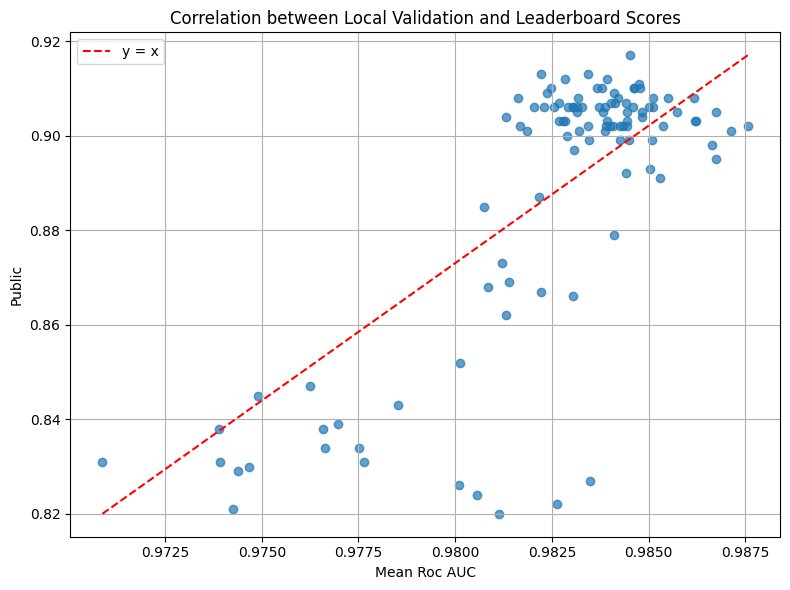

In [101]:
plot_score_correlation(
    df=metrics[metrics["Public"] > 0.7],
    local_val_col="Mean Roc AUC",
    leaderboard_col="Public"
)

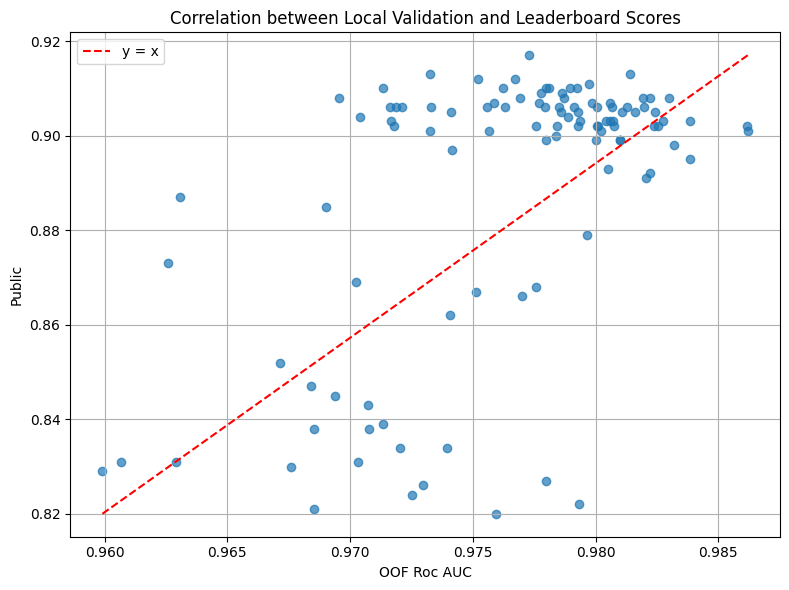

In [102]:
plot_score_correlation(
    df=metrics[metrics["Public"] > 0.7],
    local_val_col="OOF Roc AUC",
    leaderboard_col="Public"
)

In [ ]:
def plot_fold_auc_individual_histograms(df, fold_auc_col, bins=20, figsize=(8, 3)):
    """
    Plots individual histograms of ROC AUCs per fold in a vertical column layout,
    and prints useful statistics for each fold including mean, std, min, max, IQR, and median.

    Args:
        df (pd.DataFrame): DataFrame containing the fold AUC scores.
        fold_auc_col (str): Column name with List[float] per row (e.g., ROC AUCs per fold).
        bins (int): Number of bins for histograms.
        figsize (tuple): Size of each subplot (width, height).
    """
    fold_values = df[fold_auc_col].apply(eval).dropna().tolist()
    n_folds = max(len(folds) for folds in fold_values)

    # Collect AUCs per fold
    per_fold_aucs = [[] for _ in range(n_folds)]
    for folds in fold_values:
        for i, auc in enumerate(folds):
            per_fold_aucs[i].append(auc)

    # Create vertical subplots
    fig, axs = plt.subplots(n_folds, 1, figsize=(figsize[0], figsize[1] * n_folds))

    for i, (fold_aucs, ax) in enumerate(zip(per_fold_aucs, axs)):
        ax.hist(fold_aucs, bins=bins, alpha=0.75, edgecolor='black')
        ax.set_title(f'Fold {i} Histogram')
        ax.set_xlabel('ROC AUC')
        ax.set_ylabel('Frequency')
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Print stats
    print("\nFold-wise Statistics:")
    for i, fold_aucs in enumerate(per_fold_aucs):
        fold_aucs = np.array(fold_aucs)
        mean = fold_aucs.mean()
        std = fold_aucs.std()
        median = np.median(fold_aucs)
        q1 = np.percentile(fold_aucs, 25)
        q3 = np.percentile(fold_aucs, 75)
        iqr = q3 - q1
        print(
            f"Fold {i}: "
            f"mean={mean:.4f}, std={std:.4f}, median={median:.4f}, "
            f"min={fold_aucs.min():.4f}, max={fold_aucs.max():.4f}, IQR={iqr:.4f}"
        )


In [ ]:
metrics[(metrics["exp_name"].apply(lambda x: x.startswith("eca"))) & (metrics["Public"] > 0.9)]

In [ ]:
plot_fold_auc_individual_histograms(
    df=metrics[(metrics["exp_name"].apply(lambda x: x.startswith("eca"))) & (metrics["Public"] > 0.9)],
    fold_auc_col="Folds Roc AUC",
)

# Pick Best Models

In [ ]:
metrics[metrics["exp_name"].apply(lambda x: "From" not in x)].sort_values("Public", ascending=False).iloc[0].to_dict()

In [ ]:
metrics.iloc[-10:]

In [83]:
metrics.set_index("exp_name").sort_values("Public", ascending=False)["Public"].head(30).to_dict()

{'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak': 0.917,
 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_GenFilOver': 0.913,
 'eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1': 0.913,
 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_GenUni': 0.912,
 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOF_AddRareBirdsNoLeak': 0.912,
 'tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Ep

In [ ]:
# tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2MOOFRev_AddRareBirdsNoLeak - Version 161
# eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1 - Version 142
# tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P04I2_AddRareBirdsNoLeak - Version 107 

In [ ]:
# tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P06I2MOOFRev_AddRareBirdsNoLeak_CurManualV3

In [ ]:
metrics[
    metrics["exp_name"] == "eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_SqrtBalancing_Radamlr1e3_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromXCV2Best_PseudoF2PT05MT01P04I3_MinorOverSampleV1"
]

In [ ]:
metrics.iloc[99].to_dict()

In [ ]:
metrics.iloc[83].to_dict()

# Out Of Fold Predictions

In [23]:
metrics.loc[
    (~metrics["Public"].isna()) & (metrics["split_path"] == "cv_split_base_and_prev_comps_XCsnipet28032025_group_allrarebirds_hdf5_noleak.npy"),
].sort_values("Mean Roc AUC", ascending=False)

,exp_name,chkp_name,comment,split_path,Mean Roc AUC,OOF Roc AUC,Folds Roc AUC,Public,Public comment
64,eca_nfnet_l1_Exp_noamp_64bs_5sec_BasicAug_Equa...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986209,0.982749,"[0.9895208479927258, 0.9849605224564799, 0.981...",0.903,Openvino FP16 + 5 Folds Mean
77,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986172,0.982230,"[0.9884289039198257, 0.986124137204357, 0.9791...",0.908,Openvino FP16 + 5 Folds Mean
79,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985747,0.981091,"[0.9869457448054157, 0.9848932005514395, 0.979...",0.905,Openvino FP16 + 5 Folds Mean
85,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985116,0.978532,"[0.9890395837135157, 0.9838522024874385, 0.978...",0.906,Openvino FP16 + 5 Folds Mean
89,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985108,0.978715,"[0.9874663593727232, 0.98256714349967, 0.98239...",0.908,Openvino FP16 + 5 Folds Mean
107,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985003,0.980683,"[0.9877235265923859, 0.9839102766210658, 0.978...",0.906,Openvino FP16 + 5 Folds Mean
65,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984828,0.978875,"[0.9845818530736347, 0.9839222755808515, 0.981...",0.904,Openvino FP16 + 5 Folds Mean
59,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984779,0.977975,"[0.9866625276969915, 0.9825902866518308, 0.980...",0.910,Openvino FP16 + 5 Folds Mean
90,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984749,0.979722,"[0.9872234779116787, 0.983826099579853, 0.9797...",0.911,Openvino FP16 + 5 Folds Mean
103,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984620,0.979251,"[0.9865735286117553, 0.9837302060257994, 0.980...",0.910,Openvino FP16 + 5 Folds Mean


In [24]:
metrics.loc[
    (~metrics["Public"].isna()) & (metrics["split_path"] == "cv_split_base_and_prev_comps_XCsnipet28032025_group_allrarebirds_hdf5_noleak.npy"),
].sort_values("OOF Roc AUC", ascending=False)

,exp_name,chkp_name,comment,split_path,Mean Roc AUC,OOF Roc AUC,Folds Roc AUC,Public,Public comment
76,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.983185,0.982998,"[0.9833291244830058, 0.9821349985745105, 0.977...",0.908,Openvino FP16 + 5 Folds Mean
64,eca_nfnet_l1_Exp_noamp_64bs_5sec_BasicAug_Equa...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986209,0.982749,"[0.9895208479927258, 0.9849605224564799, 0.981...",0.903,Openvino FP16 + 5 Folds Mean
77,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.986172,0.982230,"[0.9884289039198257, 0.986124137204357, 0.9791...",0.908,Openvino FP16 + 5 Folds Mean
79,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985747,0.981091,"[0.9869457448054157, 0.9848932005514395, 0.979...",0.905,Openvino FP16 + 5 Folds Mean
107,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.985003,0.980683,"[0.9877235265923859, 0.9839102766210658, 0.978...",0.906,Openvino FP16 + 5 Folds Mean
63,eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Equa...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984444,0.980441,"[0.9868322079426685, 0.9834408144839427, 0.980...",0.903,Openvino FP16 + 5 Folds Mean
80,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.983425,0.980109,"[0.9868589654843735, 0.9841897912983827, 0.977...",0.902,Openvino FP16 + 5 Folds Mean
106,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984032,0.979871,"[0.9880575940949693, 0.9814437284671365, 0.977...",0.907,Openvino FP16 + 5 Folds Mean
90,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984749,0.979722,"[0.9872234779116787, 0.983826099579853, 0.9797...",0.911,Openvino FP16 + 5 Folds Mean
103,tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...,Best,5 sec train audio pred,cv_split_base_and_prev_comps_XCsnipet28032025_...,0.984620,0.979251,"[0.9865735286117553, 0.9837302060257994, 0.980...",0.910,Openvino FP16 + 5 Folds Mean


In [3]:
metrics[~metrics["Public"].isna()].sort_values("Public", ascending=False).iloc[:40].exp_name

99     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
39     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
83     eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...
38     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
98     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
90     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
45     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
59     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
61     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
54     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
103    tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
95     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
52     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
92     eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...
56     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
76     eca_nfnet_l0_Exp_noamp_64bs_5sec_BasicAug_Sqrt...
48     tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_...
62     tf_efficientnetv2_s_in21

In [4]:
~metrics["Public"].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
107     True
108    False
109    False
110    False
111    False
Name: Public, Length: 112, dtype: bool

In [ ]:
!ls /gpfs/space/projects/BetterMedicine/volodymyr1/exps/bird_clef_2025/predictions/ -lt

In [ ]:
EXP_NAME = "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P06I2MOOFRev_AddRareBirdsNoLeak_CurManualV3"

In [ ]:
conf_path = glob(f"../logdirs/{EXP_NAME}/code/*train_configs*.py")
assert len(conf_path) == 1
conf_path = conf_path[0]
!cat {conf_path}

In [ ]:
full_train_df = pd.read_csv(
    "../data/train_and_prev_comps_extendedv1_pruneSL_XConly2025_snipet28032025_hdf5_fixedaudiometa_h5pyDur.csv",
    converters={"secondary_labels": eval}
)
cv_split = np.load(
    "../data/cv_split_base_and_prev_comps_XCsnipet28032025_group_allrarebirds_hdf5_noleak.npy",
    allow_pickle=True
)
scored_birds = load_json(
    "../data/sb_2025.json"
)
int2bird = {k:v for k,v in enumerate(scored_birds)}

In [ ]:
fold_dfs = [
    full_train_df.iloc[cv_split[i][1]].reset_index(drop=True) for i in range(len(cv_split))
]

In [ ]:
def one_hot_conversion(
    primary_label,
    secondary_labels,
    mapping,
):
    all_labels = set([primary_label] + secondary_labels)
    return np.array([int(mapping[i] in all_labels) for i in range(len(mapping))])

In [ ]:
# Refers to One Hot Ground Truth Labels
# Shape List of size N (5) Folds, where each element [N_samples_in_fold, N_birds (206)]
# Type int
val_tgts = np.load(
    os.path.join("../data/predictions/", EXP_NAME, "tgts.npy"),
    allow_pickle=True
)
# Refers to Predicted Probabilities in OOF manner
# Shape List of size N (5) Folds, where each element [N_samples_in_fold, N_birds (206)]
# Type float in [0, 1] range
val_preds = np.load(
    os.path.join("../data/predictions/", EXP_NAME, "preds.npy"),
    allow_pickle=True
)

In [ ]:
# Validate that val_tgts match fold dfs labels
for i in range(len(cv_split)):
    assert np.allclose(
        np.stack(fold_dfs[i].apply(lambda row: one_hot_conversion(row["primary_label"], row["secondary_labels"], int2bird), axis=1).values),
        val_tgts[i]
    )

In [ ]:
# Compose Prediction DFs
prediction_df = []
for i in range(len(cv_split)):
    copy_fold = fold_dfs[i][["filename", "primary_label", "secondary_labels"]]
    copy_fold[scored_birds] = val_preds[i]
    prediction_df.append(copy_fold)

In [ ]:
pd.concat(prediction_df).reset_index(drop=True).to_csv(
    f"../data/bird_clef_2025_predictions/{EXP_NAME}__FULLFILE.csv", index=False
)

In [5]:
import importlib.util

def generate_prediction_csv(
    exp_name: str,
    scored_birds_path: str,
    save_path: str
) -> None:
    # Load config from code folder
    conf_path = glob(f"../logdirs/{exp_name}/code/*train_configs*.py")
    assert len(conf_path) == 1, "Expected exactly one config file"
    conf_path = conf_path[0]

    spec = importlib.util.spec_from_file_location("config_module", conf_path)
    config_module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(config_module)
    config = config_module.CONFIG

    # Load data
    full_train_df = pd.read_csv(
        os.path.join("..", config["df_path"]),
        converters={"secondary_labels": eval}
    )
    cv_split = np.load(os.path.join("..", config["split_path"]), allow_pickle=True)
    scored_birds = load_json(scored_birds_path)
    int2bird = {k: v for k, v in enumerate(scored_birds)}

    # Create fold-specific dataframes
    fold_dfs: List[pd.DataFrame] = [
        full_train_df.iloc[cv_split[i][1]].reset_index(drop=True)
        for i in range(len(cv_split))
    ]

    # Define one-hot conversion function
    def one_hot_conversion(primary_label, secondary_labels, mapping):
        all_labels = set([primary_label] + secondary_labels)
        return np.array([int(mapping[i] in all_labels) for i in range(len(mapping))])

    # Load predictions and targets
    preds_dir = os.path.join("../data/predictions/", exp_name)
    val_tgts = np.load(os.path.join(preds_dir, "tgts.npy"), allow_pickle=True)
    val_preds = np.load(os.path.join(preds_dir, "preds.npy"), allow_pickle=True)

    # Validate targets
    for i in range(len(cv_split)):
        converted_labels = np.stack(
            fold_dfs[i].apply(
                lambda row: one_hot_conversion(
                    row["primary_label"], row["secondary_labels"], int2bird
                ),
                axis=1
            ).values
        )
        assert np.allclose(converted_labels, val_tgts[i]), f"Mismatch in fold {i}"

    # Build final prediction dataframe
    prediction_df = []
    for i in range(len(cv_split)):
        fold = fold_dfs[i][["filename", "primary_label", "secondary_labels"]].copy()
        fold[scored_birds] = val_preds[i]
        prediction_df.append(fold)

    final_df = pd.concat(prediction_df).reset_index(drop=True)
    final_df.to_csv(save_path, index=False)


In [57]:
# EXP_NAME = "tf_efficientnetv2_s_in21k_Exp_noamp_64bs_5sec_BasicAug_EqualBalancing_AdamW1e4_CosBatchLR1e6_Epoch50_FocalBCELoss_LSF1005_FromPrebs1_PseudoF2PT05MT01P06I2MOOFRev_AddRareBirdsNoLeak_CurManualV3"

for exp_n in metrics[metrics["Public"].isna()].exp_name:
    try:
        if os.path.exists(f"../data/bird_clef_2025_predictions_for_optuna/{exp_n}.csv"):
            print(f"Exists {exp_n}")
            continue
        generate_prediction_csv(
            exp_name=exp_n,
            scored_birds_path="../data/sb_2025.json",
            save_path=f"../data/bird_clef_2025_predictions_for_optuna/{exp_n}.csv"
        )
    except:
        print(f"Failed on {exp_n}")

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

BackgroundNoise was not initialized
BackgroundNoise was not initialized


/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fold[scored_birds] = val_preds[i]
/tmp/ipykernel_2659205/936879388.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

In [7]:
prev_ver = pd.read_csv(
    f"../data/bird_clef_2025_predictions/{EXP_NAME}__FULLFILE.csv"
)
new_ver = pd.read_csv(
    f"../data/bird_clef_2025_predictions/test_file.csv"
)

In [11]:
(prev_ver["secondary_labels"] == new_ver["secondary_labels"]).all()

True

In [12]:
scored_birds = load_json(
    "../data/sb_2025.json"
)

In [13]:
np.allclose(prev_ver[scored_birds], new_ver[scored_birds])

True